In [5]:
#!pip install sklearn

## 1. Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## 2. Load the Breast Cancer dataset

In [2]:
# data = load_breast_cancer()
# X = data.data
# y = data.target

df = pd.read_csv('breast_cancer_dataset.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
df.shape

(569, 32)

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 3. Separate the data into dependent and independent variables(X,y)

In [5]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']


## 4. Split the dataset into Training and testing set 

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Initialize the RandomForestClassifier

In [7]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

## 6. Train the classifier

In [8]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 7. Make predictions

In [9]:
y_pred = rf_classifier.predict(X_test)
# Predict probabilities on the testing data
#y_pred = rf_classifier.predict_proba(X_test)[:, 1]


## 8. Calculate accuracy

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9649122807017544
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## 9. Plot the confusion matrix 

[[70  1]
 [ 3 40]]


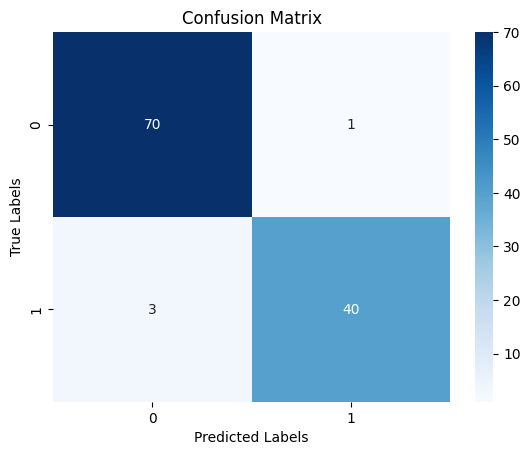

In [11]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
# Plot confusion matrix
#plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## 10. Plot the ROC_AUC  

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict probabilities on the testing data
y_prob = rf_classifier.predict_proba(X_test)[:, 1]



# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# # Calculate ROC-AUC
# roc_auc = roc_auc_score(y_test, y_pred)
# print("ROC-AUC:", roc_auc)
# 
# # Calculate ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_prob,pos_label='M')
# Calculate false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label='M')
# Calculate Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

Accuracy: 0.9649122807017544


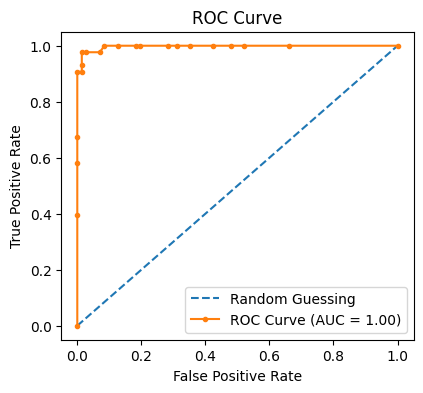

In [14]:

# Plot loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.plot(fpr, tpr, marker='.', label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

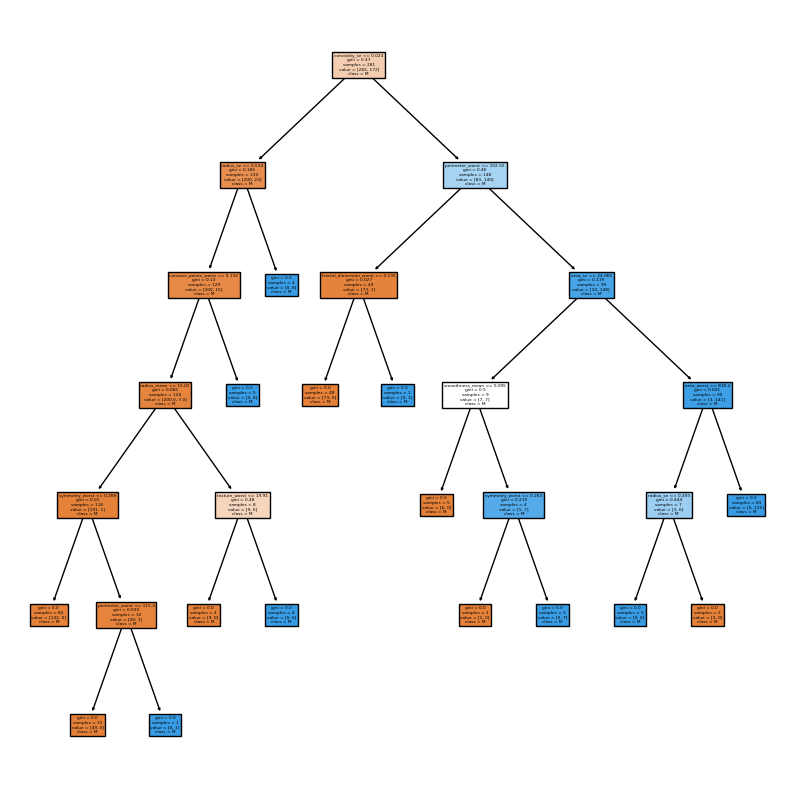

In [15]:
from sklearn.tree import plot_tree
# Visualize individual trees (e.g., the first tree)
plt.figure(figsize=(10, 10))
plot_tree(rf_classifier.estimators_[0], feature_names=X.columns, class_names=df['diagnosis'], filled=True)
plt.savefig('tree.jpeg')
plt.show()


In [16]:
accuracu = (70+40)/(1+3+70+40)
print(f'The accuracy of the model is: {accuracy}') 

The accuracy of the model is: 0.9649122807017544


## Ensemble Learning 

## 1. Import all necessary Libraries

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, mean_squared_error

## 2. Load the dataset

In [18]:
dataset = pd.read_csv("breast_cancer_dataset.csv")
dataset 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 3. Split the dataset into features (X) and target variable (y)

In [19]:

X = dataset.drop(columns=['diagnosis'])
y = dataset['diagnosis']


## 4. Split the dataset into training and testing sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 5. Initialize classifiers

In [21]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
logistic_regression = LogisticRegression(random_state=42)
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier(n_neighbors=5)
nb_classifier = GaussianNB()



## 6. Train and evaluate Random Forest classifier

In [22]:
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
y_pred_rf

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M'], dtype=object)


## 7. Train and evaluate Logistic Regression

In [23]:
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
y_pred_lr

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M'], dtype=object)


## 8. Train and evaluate SVM

In [24]:

svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
y_pred_svm

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], dtype=object)


## 9. Train and evaluate K-NN

In [25]:
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

## 10. Train and evaluate Naive Bayes

In [26]:
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)


## 11. Print accuracies

In [27]:
print("Random Forest Accuracy:", accuracy_rf)
print("Logistic Regression Accuracy:", accuracy_lr)
print("SVM Accuracy:", accuracy_svm)
print("K-NN Accuracy:", accuracy_knn)
print("Naive Bayes Accuracy:", accuracy_nb)


Random Forest Accuracy: 0.9649122807017544
Logistic Regression Accuracy: 0.956140350877193
SVM Accuracy: 0.6228070175438597
K-NN Accuracy: 0.7543859649122807
Naive Bayes Accuracy: 0.6140350877192983


In [33]:
# Example code assuming you have trained and obtained predictions for ensemble models
ensemble_models = [rf_classifier, logistic_regression, svm_classifier,nb_classifier,knn_classifier ]  # List of trained ensemble models
ensemble_predictions = [y_pred_rf,y_pred_lr,y_pred_svm,y_pred_knn,y_pred_nb]

# Obtain predictions for each ensemble model
for model in ensemble_models:
    predictions = model.predict(X_test)  # Assuming X_test is your test data
    ensemble_predictions.append(predictions)
ensemble_predictions

[array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
        'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
        'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
        'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
        'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
        'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
        'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
        'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
        'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M'], dtype=object),
 array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
        'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
        'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
        'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
        'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B

In [37]:

# Combine predictions using averaging
#combined_predictions = sum(ensemble_predictions) / len(ensemble_predictions)
#combined_predictions = [1 if pred >= 0.5 else 0 for pred in combined_predictions]  # Convert probabilities to binary predictions

# Calculate accuracy of individual models
individual_accuracies = [model.score(X_test, y_test) for model in ensemble_models]

# Calculate accuracy of combined predictions
#accuracy_combined = accuracy_score(y_test, combined_predictions)

# Print summary of results
print("Summary of Results:")
for i, model in enumerate(ensemble_models):
    print(f"Model {i+1} Accuracy: {individual_accuracies[i]}")
print(f"Accuracy of Combined Predictions: {accuracy_combined}")


Summary of Results:
Model 1 Accuracy: 0.9649122807017544
Model 2 Accuracy: 0.956140350877193
Model 3 Accuracy: 0.6228070175438597
Model 4 Accuracy: 0.6140350877192983
Model 5 Accuracy: 0.7543859649122807


NameError: name 'accuracy_combined' is not defined

## Max_Voting 

In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = SVC(kernel='linear', random_state=42)
model3 = RandomForestClassifier(n_estimators=100, random_state=42)
model4 = KNeighborsClassifier(n_neighbors=5)
model5 = GaussianNB()

model = VotingClassifier(estimators=[('lr', model1),('svm',model2),('rfc',model3), ('knn', model4),('nvb',model5)], voting='hard')
model.fit(X_train,y_train)
model.score(X_test,y_test)


## Average Voting 

## Initialize models

In [17]:
model1 = LogisticRegression(random_state=1)
model2 = SVC(kernel='linear', random_state=42)
#model3 = RandomForestClassifier(n_estimators=100, random_state=42)
model4 = KNeighborsClassifier(n_neighbors=5)
model5 = GaussianNB()


## Train The models 

In [20]:

model1.fit(X_train, y_train)
#model2.fit(X_train, y_train)
#model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)
 

GaussianNB()

## prediction results

In [21]:

pred1 = model1.predict(X_test)
#pred2 = model2.predict(X_test)
#pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)
pred5 = model5.predict(X_test)

finalpred = (pred1+pred4+pred5)/4

print(finalpred)
finalpredwa=(pred1*0.2+pred4*0.3+pred5*0.3)
print(finalpredwa)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

## Weighted Average Voting 

In [ ]:
model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict_proba(x_test)
pred2=model2.predict_proba(x_test)
pred3=model3.predict_proba(x_test)

finalpred=(pred1*0.3+pred2*0.3+pred3*0.4)

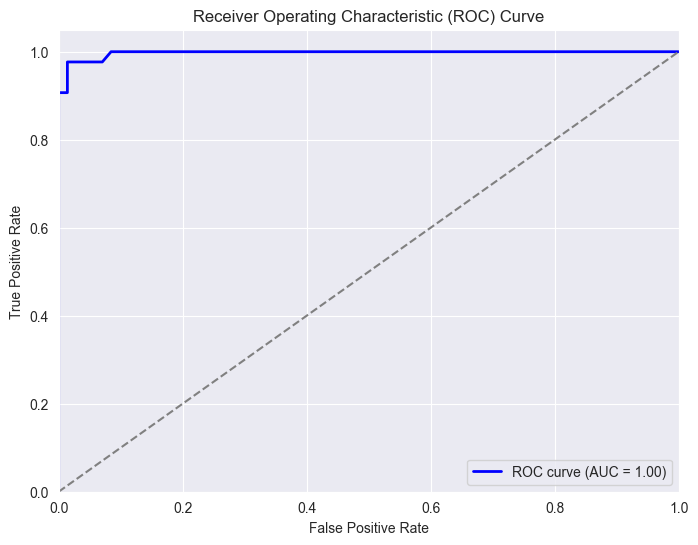

In [24]:

 import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Load the breast cancer dataset from CSV file
dataset = pd.read_csv("breast_cancer_dataset.csv")

# Preprocessing: Convert categorical labels to numerical labels if needed

# Split the dataset into features (X) and target variable (y)
X = dataset.drop(columns=['diagnosis'])
y = dataset['diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict probabilities on the testing data
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, _ = roc_curve(y_test, y_prob,pos_label='M')

# Calculate Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [25]:
import pandas as pd
from tabulate import tabulate
results = [
    {"Model": "Model 1", "Accuracy": 0.85, "Precision": 0.82, "Recall": 0.88, "F1-score": 0.85},
    {"Model": "Model 2", "Accuracy": 0.90, "Precision": 0.88, "Recall": 0.92, "F1-score": 0.90},
    {"Model": "Model 3", "Accuracy": 0.88, "Precision": 0.85, "Recall": 0.90, "F1-score": 0.88}
]
# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Convert the DataFrame to a tabular format
tabular_summary = tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False)

# Print the tabular summary
print(tabular_summary)


+---------+----------+-----------+--------+----------+
|  Model  | Accuracy | Precision | Recall | F1-score |
+---------+----------+-----------+--------+----------+
| Model 1 |   0.85   |   0.82    |  0.88  |   0.85   |
| Model 2 |   0.9    |   0.88    |  0.92  |   0.9    |
| Model 3 |   0.88   |   0.85    |  0.9   |   0.88   |
+---------+----------+-----------+--------+----------+
